In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
cdf = pd.read_csv("./data/consumption.csv", sep=",")
pdf = pd.read_csv("./data/consumption.csv", sep=",")

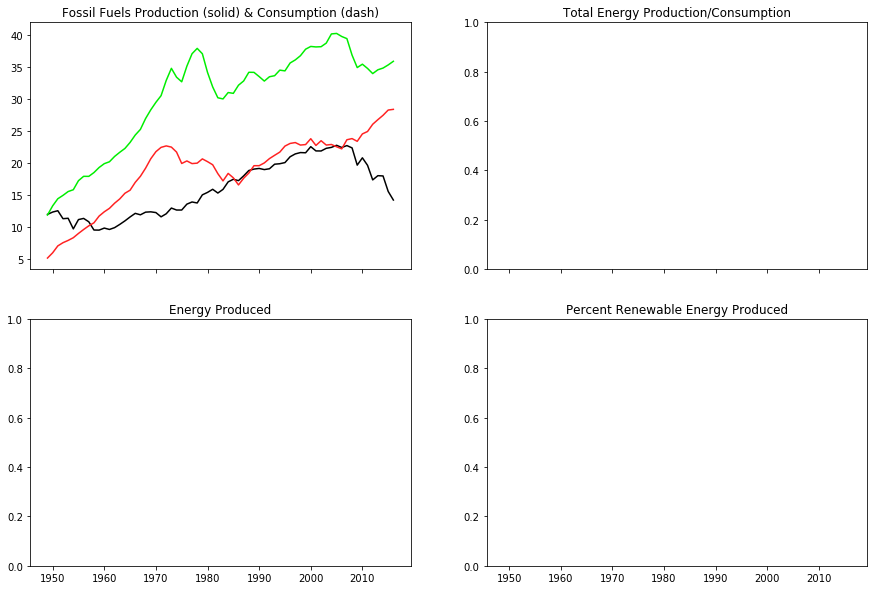

In [25]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, figsize=(15,10))

x = cdf['Year']
coal_production = pdf.iloc[:,1]
gas_production = pdf.iloc[:,2]
oil_production = pdf.iloc[:,3]

coal_black = '#000000';
gas_red = '#ff2222';
oil_green = '#00ee00';

ax1.plot(x, coal_production, c=coal_black)
ax1.plot(x, gas_production, c=gas_red)
ax1.plot(x, oil_production, c=oil_green)

ax1.set_title("Fossil Fuels Production (solid) & Consumption (dash)")

ax2.set_title("Total Energy Production/Consumption")

ax3.set_title("Energy Produced")

ax4.set_title("Percent Renewable Energy Produced")

plt.show()